In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
dataset=pd.read_csv("../Datasets/startup_funding.csv")
df=dataset.copy()
print(df)

       SNo        Date       StartupName   IndustryVertical  \
0        0  01/08/2017          TouchKin         Technology   
1        1  02/08/2017           Ethinos         Technology   
2        2  02/08/2017      Leverage Edu  Consumer Internet   
3        3  02/08/2017              Zepo  Consumer Internet   
4        4  02/08/2017      Click2Clinic  Consumer Internet   
...    ...         ...               ...                ...   
2367  2367  29/01/2015        Printvenue                NaN   
2368  2368  29/01/2015          Graphene                NaN   
2369  2369  30/01/2015    Mad Street Den                NaN   
2370  2370  30/01/2015         Simplotel                NaN   
2371  2371  31/01/2015  couponmachine.in                NaN   

                                        SubVertical CityLocation  \
0                          Predictive Care Platform    Bangalore   
1                          Digital Marketing Agency       Mumbai   
2     Online platform for Higher Educat

In [23]:
df.dropna(subset=["InvestorsName","StartupName"],inplace=True)
df.reset_index(drop = True, inplace = True)
print(df)

       SNo        Date       StartupName   IndustryVertical  \
0        0  01/08/2017          TouchKin         Technology   
1        1  02/08/2017           Ethinos         Technology   
2        2  02/08/2017      Leverage Edu  Consumer Internet   
3        3  02/08/2017              Zepo  Consumer Internet   
4        4  02/08/2017      Click2Clinic  Consumer Internet   
...    ...         ...               ...                ...   
2359  2367  29/01/2015        Printvenue                NaN   
2360  2368  29/01/2015          Graphene                NaN   
2361  2369  30/01/2015    Mad Street Den                NaN   
2362  2370  30/01/2015         Simplotel                NaN   
2363  2371  31/01/2015  couponmachine.in                NaN   

                                        SubVertical CityLocation  \
0                          Predictive Care Platform    Bangalore   
1                          Digital Marketing Agency       Mumbai   
2     Online platform for Higher Educat

In [29]:
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("OlaCabs","Ola",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']
print(df.head())

   SNo        Date   StartupName   IndustryVertical  \
0    0  01/08/2017      TouchKin         Technology   
1    1  02/08/2017       Ethinos         Technology   
2    2  02/08/2017  Leverage Edu  Consumer Internet   
3    3  02/08/2017          Zepo  Consumer Internet   
4    4  02/08/2017  Click2Clinic  Consumer Internet   

                                     SubVertical CityLocation  \
0                       Predictive Care Platform    Bangalore   
1                       Digital Marketing Agency       Mumbai   
2  Online platform for Higher Education Services    New Delhi   
3                         DIY Ecommerce platform       Mumbai   
4                  healthcare service aggregator    Hyderabad   

                                       InvestorsName  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Private Equity   
2  Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...    Seed F

In [64]:
investor_name=[]
startup_name=[]

for index,row in df.iterrows():
    i=row["InvestorsName"]
    s=row["StartupName"]
    
    i=str(i)
    temp=i.split(',')
    for j in temp:
        if(j!=''):
            investor_name.append(j)
            startup_name.append(s)
    
newDf=pd.DataFrame({"InvestorsName":investor_name,"StartupName":startup_name})
newDf=newDf.groupby('InvestorsName')['StartupName'].nunique()
newDf=newDf.sort_values(ascending=False).head(5)
print(newDf)


InvestorsName
Sequoia Capital         34
Accel Partners          33
Indian Angel Network    33
Kalaari Capital         30
Ratan Tata              28
Name: StartupName, dtype: int64


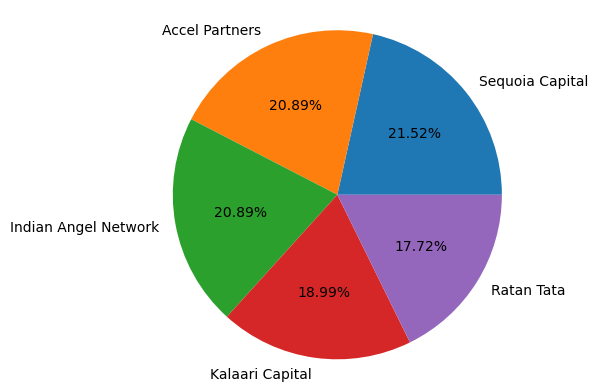

In [65]:
plt.pie(newDf.values,labels=newDf.index,autopct="%.2f%%")
plt.axis("equal")
plt.show()